In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

import warnings
warnings.filterwarnings('ignore')



### Q1. Recommend a best book based on the ratings.

In [2]:
book=pd.read_csv("RS_csv", encoding="latin-1")
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


#### Renaming the columns for easier access

In [3]:
books=book.rename({'User.ID':'user_id','Book.Title':'book_title','Book.Rating':'book_rating'},axis=1)
books.head()

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   user_id      10000 non-null  int64 
 2   book_title   10000 non-null  object
 3   book_rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


## Data Visualization

Text(0.5, 1.0, 'Ratings Frequency')

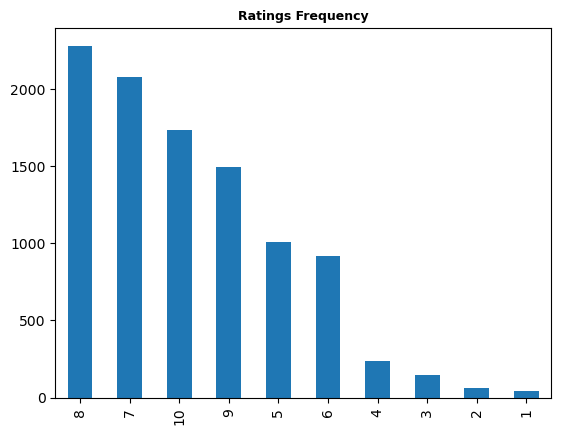

In [57]:
books['book_rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 9, fontweight = 'bold')

### Observations:

Most Frequent Ratings by Users are: 8,7 and 10

In [5]:
book.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


Observation:  <span style='color:green'> Mean = 7.56 and Max or 90 quantile = 10 

 1 .The mean is 7.5663, it suggests that the average rating of the books is around 7.5663.
 
 2 .The Max or quantile(0.90) is 10.000, means that 90% of the ratings fall below or equal to this value while the remaining 10% of the ratings are above it
 
And it helps identify a rating cutoff that separates the majority of books from the top-rated books.

### Number of unique users

In [6]:
len(books['user_id'].unique())

2182

### Number of unique books

In [7]:
len(books['book_title'].unique())

9659

In [8]:
book_df =books.pivot_table(index='user_id',columns='book_title',values='book_rating').fillna(0)

In [9]:
book_df.head()

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Creating a list of book category which has a book rating greater than or euqal to 10

In [10]:
q_Books = books.copy().loc[books['book_rating'] >=10.00000]

In [11]:
q_Books.shape

(1732, 4)

### Using cosine function to find the more similar books based on the lower cosine angle between the vectors

The function "pairwise_distances" calculates the distances or similarities between pairs of vectors. When you subtract the result from 1, you are converting the similarity values to dissimilarity values.


By subtracting the pairwise distances from 1, you are essentially transforming the values to represent dissimilarity. This is a common approach, where 1 indicates perfect similarity and O represents perfect dissimilarity.

In [12]:
c_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
c_sim.shape

(2182, 2182)

In [13]:
c_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
c_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

c_sim[1] will retrieve the second row of the matrix, which represents the similarity scores of the second user with all other users.

In [17]:
c_sim_df = pd.DataFrame(c_sim)
c_sim_df.index = books.user_id.unique()
c_sim_df.columns = books.user_id.unique()

In [19]:
c_sim_df.shape

(2182, 2182)

In [20]:
c_sim_df.iloc[0:10,0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
u=books[(books['user_id']==276729)|(books['user_id']==26)]
u

,Unnamed: 0,user_id,book_title,book_rating
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
2419,2420,26,The Jester,10
2420,2421,26,Jupiter's Bones: A Novel (Peter Decker &amp; R...,9


#### Assigning user_1 with a particular user id

In [33]:
u1=books[(books['user_id']==276729)]
u1

,Unnamed: 0,user_id,book_title,book_rating
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6


#### Assigning user_2 with a particular user id

In [35]:
u2=books[(books['user_id']==26)]
u2

,Unnamed: 0,user_id,book_title,book_rating
2419,2420,26,The Jester,10
2420,2421,26,Jupiter's Bones: A Novel (Peter Decker &amp; R...,9


This helps in easily retrieving the index of a book based on its title or performing operations that involve book

titles and their associated indices.

In [36]:
indices = pd.Series(books.index, index=books['book_title']).drop_duplicates()

In [37]:
indices[:10]

book_title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

### Creating a user defined function, 

That will get the book title and the cosine similarity as input and return a list of books thats are similar to the book  that was given as input argument to the function

In [49]:
def get_recommendation(book_title,cosine_sim=c_sim):
    
    idx= indices[book_title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores,key=lambda x:x[1],reverse =True)
    
    sim_scores  = sim_scores[0:11]
    
    book_id    = [i[0] for i in sim_scores]
    
    return books['book_title'].iloc[book_id]

1. enumerate () allows you to iterate over a sequence (such as a list, tuple, or string) while keeping track of the index of each element.


2. The lambda function is defined as lambda x: x[1]. It takes a single argument x and returns x[1], which is the second element of the tuple x.


3. i[0] for i in sim_score It creates a new list called books_indices by extracting the first element of each tuple in the sim_scores list.

## Trying To Predict Similar To Other Books 

In [50]:
book1=get_recommendation('Under the Black Flag: The Romance and the Reality of Life Among the Pirates')
book1

8     Under the Black Flag: The Romance and the Real...
0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

In [52]:
book2=get_recommendation ('Classical Mythology')
book2

0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

## Inference :

#### An association that is created here works well using the cosine similarity.